In [1]:
#import pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv(r"C:\Users\Odh05\Desktop\Ai_training\fruit.txt", sep='\t')

In [2]:
pima.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
pima.fruit_subtype = LabelEncoder().fit_transform(pima.fruit_subtype)

In [10]:
#split dataset in features and target variable
feature_cols = ['fruit_subtype','mass', 'width','height','color_score']
X = pima[feature_cols] # Features
y = pima.fruit_label # Target variable

In [11]:
# split X and y into training and testing sets
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
# import the class

from sklearn.naive_bayes import GaussianNB

# instantiate the model (using the default parameters)
model = GaussianNB()

# fit the model with data
model.fit(X_train,y_train)

#
y_pred = model.predict(X_test)

In [13]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 7, 1],
       [0, 0, 0, 2]], dtype=int64)

In [14]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
%matplotlib inline

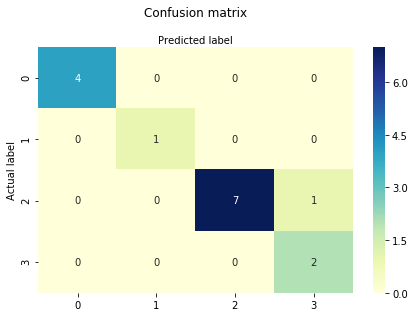

In [15]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Precision:",metrics.precision_score(y_test, y_pred))
# print("precision_score",y_test, y_pred, average='micro')
print("Precision Score : ", precision_score(y_test, y_pred, pos_label='positive',average='weighted'))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.933333333333
Precision Score :  0.955555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1045: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


ValueError: Target is multiclass but average='binary'. Please choose another average setting.

In [17]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='1')
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:324: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  y_true = (y_true == pos_label)


TypeError: 'bool' object is not subscriptable